# Data Augmentation To Address Overfitting In Flower Classification CNN

Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load Flowers dataset

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:4]

[PosixPath('datasets/flower_photos/dandelion/3580437733_9ef51f2981_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8744249948_36cb1969f8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/1443259657_2704fab26e_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7243174412_d3628e4cc4_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:4]

[PosixPath('datasets/flower_photos/roses/4504731519_9a260b6607_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/4809566219_88f9a1aea3.jpg')]

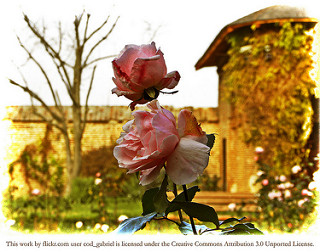

In [9]:
PIL.Image.open(str(roses[1]))

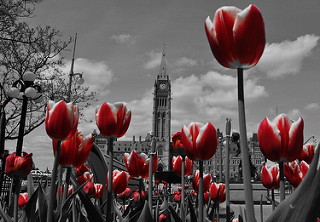

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### Read flowers images from disk into numpy array using opencv

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
flowers_images_dict['daisy'][:4]

[PosixPath('datasets/flower_photos/daisy/5811226952_4650ed70ae_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2351206867_084e57bd97.jpg'),
 PosixPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/1396526833_fb867165be_n.jpg')]

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(242, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

### Splitting the dataset into Test and Training set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build CNN and train it

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 91s 1s/step - loss: 1.3983 - accuracy: 0.3917
Epoch 2/30
86/86 [==============================] - 85s 988ms/step - loss: 1.0506 - accuracy: 0.5745
Epoch 3/30
86/86 [==============================] - 88s 1s/step - loss: 0.8972 - accuracy: 0.6512
Epoch 4/30
86/86 [==============================] - 86s 997ms/step - loss: 0.7370 - accuracy: 0.7267
Epoch 5/30
86/86 [==============================] - 87s 1s/step - loss: 0.5412 - accuracy: 0.7980
Epoch 6/30
86/86 [==============================] - 85s 990ms/step - loss: 0.3579 - accuracy: 0.8725
Epoch 7/30
86/86 [==============================] - 88s 1s/step - loss: 0.2185 - accuracy: 0.9251
Epoch 8/30
86/86 [==============================] - 89s 1s/step - loss: 0.1474 - accuracy: 0.9564
Epoch 9/30
86/86 [==============================] - 85s 993ms/step - loss: 0.0740 - accuracy: 0.9829
Epoch 10/30
86/86 [==============================] - 87s 1s/step - loss: 0.0618 - accuracy: 0.9844
Epoch 1

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 16s 533ms/step - loss: 2.7018 - accuracy: 0.6264


[2.701765537261963, 0.6263616681098938]

 **Train accuracy is very high (99%), the test accuracy is significantly low (62.63%) indicating overfitting.**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 9s 284ms/step


array([[ -7.9412584 ,  16.90043   ,   0.34436527,  -8.98104   ,
         -3.5404997 ],
       [ 26.87869   ,  -7.5176907 , -29.193838  ,  -7.1058435 ,
         20.443357  ],
       [ -1.6573517 ,  -2.1002884 ,   9.570676  ,  -2.9680495 ,
         -0.5971984 ],
       ...,
       [  0.13753843, -10.901718  ,  -2.909703  ,  27.967598  ,
          5.457763  ],
       [ -2.524391  ,  11.543377  ,  -1.8191842 , -10.042399  ,
          6.678633  ],
       [ -7.681594  , -12.056025  ,  10.3768635 ,  23.84554   ,
          7.0102615 ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

### Improve Test Accuracy Using Data Augmentation

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Original Image

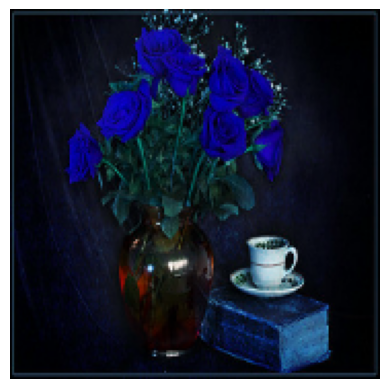

In [29]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

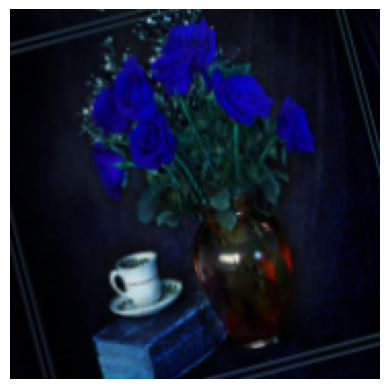

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 107s 1s/step - loss: 1.2710 - accuracy: 0.4622
Epoch 2/30
86/86 [==============================] - 106s 1s/step - loss: 0.9940 - accuracy: 0.6065
Epoch 3/30
86/86 [==============================] - 102s 1s/step - loss: 0.9115 - accuracy: 0.6453
Epoch 4/30
86/86 [==============================] - 113s 1s/step - loss: 0.8481 - accuracy: 0.6741
Epoch 5/30
86/86 [==============================] - 100s 1s/step - loss: 0.7802 - accuracy: 0.7024
Epoch 6/30
86/86 [==============================] - 103s 1s/step - loss: 0.7504 - accuracy: 0.7118
Epoch 7/30
86/86 [==============================] - 115s 1s/step - loss: 0.7159 - accuracy: 0.7329
Epoch 8/30
86/86 [==============================] - 103s 1s/step - loss: 0.6843 - accuracy: 0.7482
Epoch 9/30
86/86 [==============================] - 106s 1s/step - loss: 0.6608 - accuracy: 0.7522
Epoch 10/30
86/86 [==============================] - 98s 1s/step - loss: 0.6243 - accuracy: 0.7642
Epoch 11/3

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 18s 627ms/step - loss: 1.1219 - accuracy: 0.7102


[1.1219379901885986, 0.7102396488189697]

**By using data augmentation and drop out layer the accuracy of test set predictions is increased to 71.02%**